# Dataset y modelo de clasificación de flores de la familia Iris

**Autor**: Marcos Gómez (ai@marquitos.space). 14 oct 2021

**Repositorio de Código Abierto**: https://github.com/margobra8/ml-masterclass-te

**Licencia del código en este notebook**: [GNU AGPLv3](https://github.com/margobra8/ml-masterclass-te/blob/main/LICENSE)

**Fuente del dataset**: UC Irvine, Fisher. https://archive.ics.uci.edu/ml/datasets/iris

**Información del dataset (conjunto de datos)**:

> A small classic dataset from Fisher, 1936. One of the earliest datasets used for evaluation of classification methodologies.

**Imagen de las especies Iris**

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

Obtenido de: https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

In [1]:
### IRIS DATASET CLASSIFICATION TRAINING FOR TELECOEMPRENDE ML MASTERCLASS
## Author: Marcos Gómez (ai@marquitos.space)
## LICENSE: GNU AGPLv3 (refer to the LICENSE FILE at https://github.com/margobra8/ml-masterclass-te/blob/main/LICENSE)

# Importación de librerías necesarias
import numpy as np # numpy - librería de cálculo funcional numérico (MATLAB para Python)
import pandas as pd # pandas - librería para trabajar con conjuntos de datos (datasets)
import seaborn as sns # seaborn - librería de visualización avanzada
import matplotlib.pyplot as plt # matplotlib - librería de gráficas
import matplotlib

In [26]:
iris = pd.read_csv('iris.csv') # asignar a la variable iris el dataset importado del fichero iris.csv
iris.head(10) # mostrar las primeras 10 filas del fichero

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.info() # mostrar informacion general de interés sobre el conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe() # mostrar información estadística general sobre el cjto de datos

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.columns # cuáles son las variables (columnas) de mi dataset?

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris.shape # cuántas filas y columnas tengo en total ?

(150, 5)

In [7]:
iris.isnull().sum() # tengo algún valor vacío en alguna de las variables para alguna celda ?

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# sabemos que hay 3 especies distintas de flor Iris.
iris.species.value_counts() # cuántas especies distintas hay y cuantos ejemplares de cada especie?

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

# Visualización de los datos 

In [9]:
# Ignorar si no se entiende: estamos fijando el estilo de colores y gráficos de la librería Seaborn y Matplotlib
# para más info
#     seaborn: https://seaborn.pydata.org/generated/seaborn.set_theme.html 
#     matplotlib: https://matplotlib.org/stable/tutorials/introductory/customizing.html

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('darkgrid')

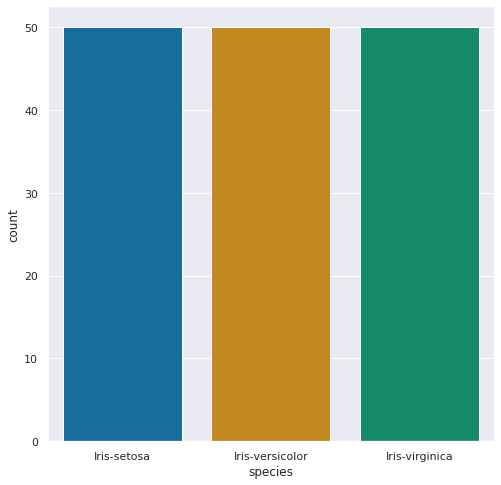

In [10]:
# gráfico un poco redundante porque ya lo sabemos, pero... y si quiero saber visualmente cuantos ejemplares o entradas
# (rows) tengo de cada especie?

sns.countplot(x='species',data=iris)

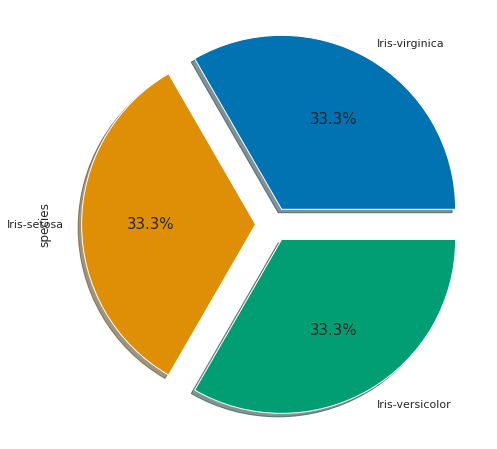

In [11]:
# vale y qué porcentaje de mi dataset entero representan las entradas de cada especie distinta?

iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%'
                                        ,shadow=True, figsize=(10,8))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


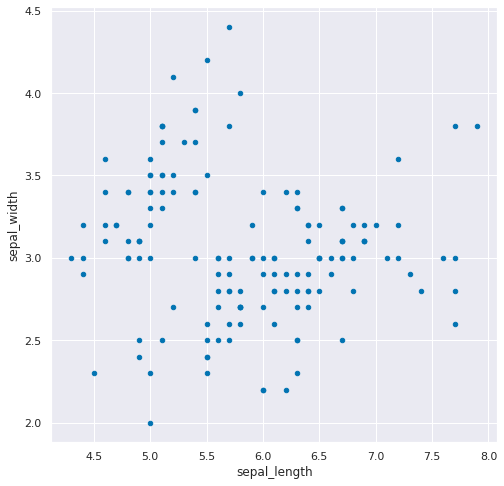

In [12]:
# me gustaría saber como están correlacionadas la longitud del sépalo con el ancho del sépalo *de todas las especies a la vez*

iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

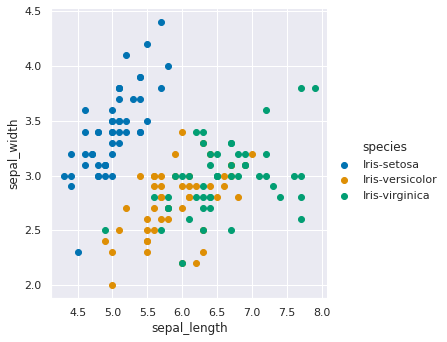

In [14]:
# ahora quiero ver de un plumazo cómo de correlacionadas están la longitud y ancho del sépalo para cada especie
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

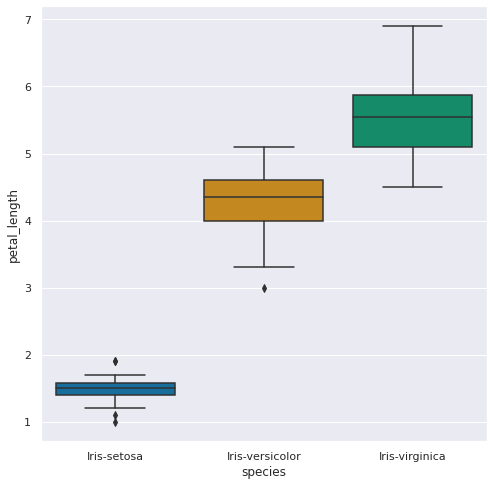

In [15]:
# Puedo usar gráficos de cajitas para ver donde se concentran los valores de una determinada variable para cada especie
sns.boxplot(x="species", y="petal_length", data=iris)

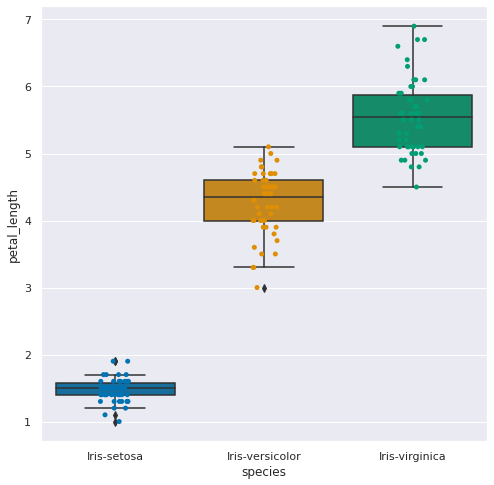

In [17]:
# le puedo poner los valores discretos encima si me siento fino en el día de hoy

ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

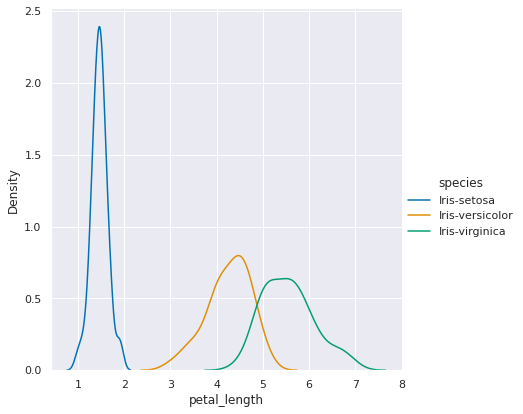

In [19]:
# vamos a ver la distribución de valores de una variable determinada para cada especie

sns.FacetGrid(iris, hue="species", height=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd813b45690>,
      dtype=object)

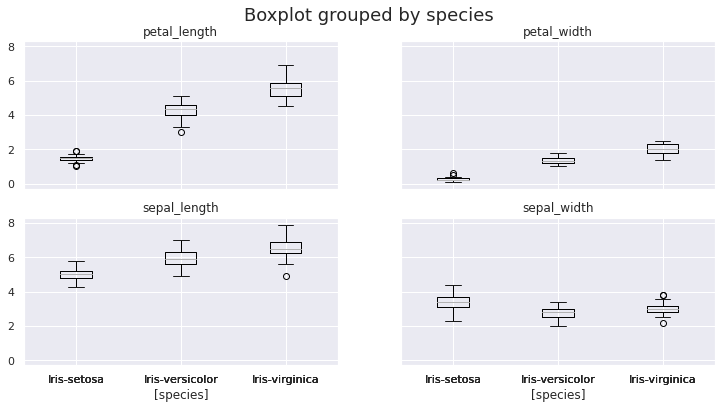

In [20]:
# boxplot de antes pero de todas las variables y de todas las especies
iris.boxplot(by="species", figsize=(12, 6))

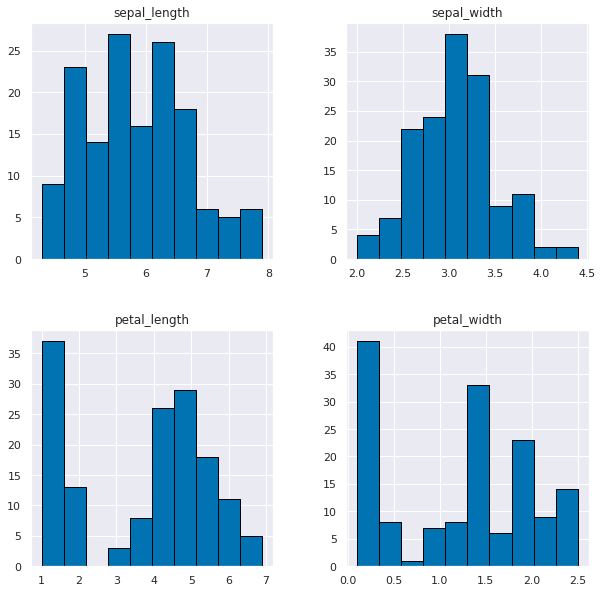

In [21]:
# histograma de densidad de valores de distintas variables para todas las especies
iris.hist(edgecolor='black',figsize=(10,10))
plt.show()

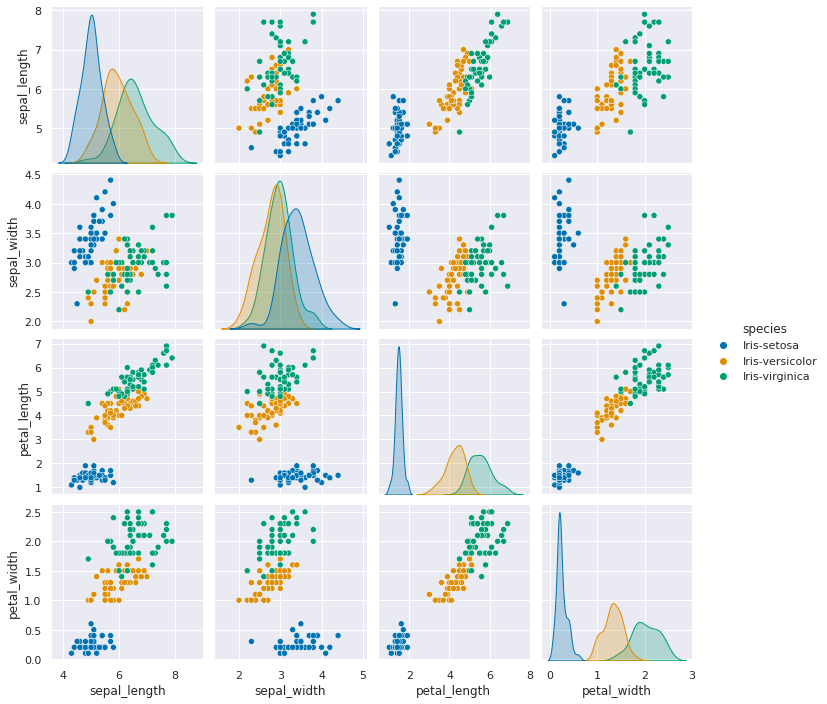

In [22]:
# mi favorita: todo de una jajaj, usamos pairplot sobre el dataset que estamos trabajando y agrupamos el color por especie
sns.pairplot(iris , hue='species');

In [27]:
# no mola trabajar con "strings" cuando estamos tratando con datos (excepto si el problema
# se basa en el procesamiento de strings como NLP) así que asignamos un número para cada especie
# a través de un diccionario de Python y la función replace de pandas sobre el dataset 'iris'

species = {
    "species" : {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
}
iris.replace(species,inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
iris.corr() # visualizar la matriz de correlación entre variables

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [29]:
# le ponemos colorinchis
iris.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.00,-0.11,0.87,0.82,0.78
sepal_width,-0.11,1.00,-0.42,-0.36,-0.42
petal_length,0.87,-0.42,1.00,0.96,0.95
petal_width,0.82,-0.36,0.96,1.00,0.96
species,0.78,-0.42,0.95,0.96,1.00


# Preparación de datos (data preprocessing)

In [32]:
# Vamos a preparar los datos para realizar el entrenamiento del modelo
# como hablamos antes: debemos dejar una parte de los datos fuera para poder verificar la correcta generalización y
# métricas del modelo de manera independiente (no vale probar con los datos usados para entrenar porque entonces estamos
# haciendo trampas ya que se los ha "aprendido")

# visualizamos un resumen de nuestra tabla de datos/cjto de datos/dataset una vez más
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
from sklearn.model_selection import train_test_split # importamos las funciones de split automáticas de sklearn para partir el cjto de datos con una fracción
from sklearn import metrics # importamos las métricas para poder comprobar lo "bien" que funciona el modelo
from sklearn.metrics import accuracy_score # importamos una métrica en particular que se llama accuracy_score (fraccion de aciertos en predicción de nuestro modelo)

In [34]:
x = iris.drop('species', axis=1) # preparamos un dataset auxiliar "x" donde dejar solo las variables de entrada (input variables)
y= iris.species # preparar un dataset aux "y" donde solo tengamos la variable objetivo (1 columna, especie)

# veamos las filas y columnas de cada dataset auxiliar
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [35]:
# le decimos a la funcion de split que queremos que el 40% del dataset se use para verificar y validar el modelo y el resto para entrenar
# el random_state es simplemente una semilla para el seleccionador de datos aleatorios
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

# vemos como han quedado nuestros datasets spliteados correctamente
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(90, 4)
(90,)
(60, 4)
(60,)


# Entrenamiento y test con el modelo KNN (K-nearest neighbours)

In [36]:
from sklearn.neighbors import KNeighborsClassifier # importamos el clasificador KNN de nuestra querida libreria sk-learn

In [53]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') # probamos primero con un clasificador que busca los 5 vecinnos más cercanos a cada punto
# con p=2 y metrica "minkowski" usamos la distancia euclídea como medida de distancia entre dos puntos

# entrenamos con fit !
knn.fit(x_train, y_train)

# vemos la accuracy primero con los mismos datos que usamos para entrenar y con los datos que separamos exclusivamente para verificar
print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))

The accuracy of the knn classifier is 0.97 out of 1 on training data
The accuracy of the knn classifier is 0.97 out of 1 on test data


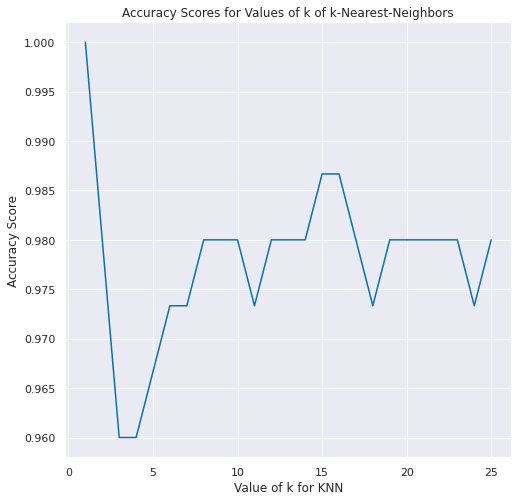

In [44]:
# AVANZADO: cuál es la k óptima ?
# se usa el método del codo, que busca un compromiso entre accuracy y rapidez 

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [57]:
# predecimos especie de flor Iris para unos valores determinados nuevos

new_data = np.array([6.6, 2.9, 5.1, 2.4]).reshape(1, -1) # hemos medido nuevos datos, el reshape es para darle el formato específico para que se procese
new_data

array([[6.6, 2.9, 5.1, 2.4]])

In [58]:
# predecimos a ver que sale"
# recordamos : "species" : {"Iris-setosa": 0,"Iris-versicolor": 1,"Iris-virginica": 2}

knn.predict(new_data)

# la especie que debería ser es "Iris-virginica" (debe salir un 2)

array([2])

> ¡Gracias por haberme prestado tu tiempo y espero que hayas aprendido!  
> Pronto encontrarás más recursos e info en [ml-te.marquitos.space](https://ml-te.marquitos.space)